In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv("D:\\230968364\\employment.csv")
df

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
118,2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
119,2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1
120,2010-01-01,21.3,11.1,24.7,14.1,5.5,6.6,4.3,10.0,14.2,13.0,9.1,11.1,10.0,7.2,11.3,10.5


In [2]:
df.describe()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,9.840984,6.919672,9.426230,6.025410,3.420492,3.540164,2.581148,5.486885,8.315574,5.982787,5.088525,5.930328,5.096721,3.031967,4.935246,5.766393
std,3.962067,1.862534,4.587619,2.854475,0.877538,1.235405,0.686750,2.016582,1.605570,2.484221,2.942428,1.922330,1.317457,1.124429,1.753340,1.463417
min,2.400000,4.100000,4.400000,2.800000,1.800000,2.100000,1.300000,2.400000,5.900000,3.100000,0.300000,3.100000,2.900000,1.700000,2.300000,3.600000
25%,6.900000,5.600000,6.100000,4.125000,2.900000,2.700000,2.100000,3.900000,7.300000,4.500000,3.200000,4.825000,4.200000,2.400000,3.900000,4.800000
50%,9.600000,6.450000,8.100000,5.100000,3.200000,3.300000,2.400000,5.150000,8.050000,5.300000,4.300000,5.500000,4.900000,2.700000,4.400000,5.400000
75%,11.950000,7.875000,10.975000,6.775000,3.700000,3.700000,2.875000,6.900000,8.800000,6.600000,6.050000,6.100000,5.600000,3.200000,5.400000,6.200000
max,21.300000,12.000000,27.100000,14.100000,6.100000,7.500000,5.100000,11.500000,14.200000,13.000000,16.100000,12.000000,10.000000,7.200000,11.300000,10.500000


In [3]:
df.dtypes

datestamp                          object
Agriculture                       float64
Business services                 float64
Construction                      float64
Durable goods manufacturing       float64
Education and Health              float64
Finance                           float64
Government                        float64
Information                       float64
Leisure and hospitality           float64
Manufacturing                     float64
Mining and Extraction             float64
Nondurable goods manufacturing    float64
Other                             float64
Self-employed                     float64
Transportation and Utilities      float64
Wholesale and Retail Trade        float64
dtype: object

### 1.Converting datestamp column to a datetime object and setting the datestamp columns as the index of DataFrame

In [4]:
df['datestamp'] = pd.to_datetime(df['datestamp'])

In [5]:
df.dtypes

datestamp                         datetime64[ns]
Agriculture                              float64
Business services                        float64
Construction                             float64
Durable goods manufacturing              float64
Education and Health                     float64
Finance                                  float64
Government                               float64
Information                              float64
Leisure and hospitality                  float64
Manufacturing                            float64
Mining and Extraction                    float64
Nondurable goods manufacturing           float64
Other                                    float64
Self-employed                            float64
Transportation and Utilities             float64
Wholesale and Retail Trade               float64
dtype: object

In [6]:
df.set_index('datestamp', inplace = True)
df

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1


#### Checking if there are missing values in each column. 

In [7]:
df.isnull().sum()

Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64

In [15]:
melted_data = df.reset_index().melt(id_vars='datestamp', var_name='industry', value_name='unemployment_rate')
melted_data.set_index('datestamp', inplace = True)
melted_data

,industry,unemployment_rate
datestamp,,
2000-01-01,Agriculture,10.3
2000-02-01,Agriculture,11.5
2000-03-01,Agriculture,10.4
2000-04-01,Agriculture,8.9
2000-05-01,Agriculture,5.1
...,...,...
2009-10-01,Wholesale and Retail Trade,9.6
2009-11-01,Wholesale and Retail Trade,9.2
2009-12-01,Wholesale and Retail Trade,9.1


### 2. Generating a boxplot to find the distribution of unemployment rate for every industry

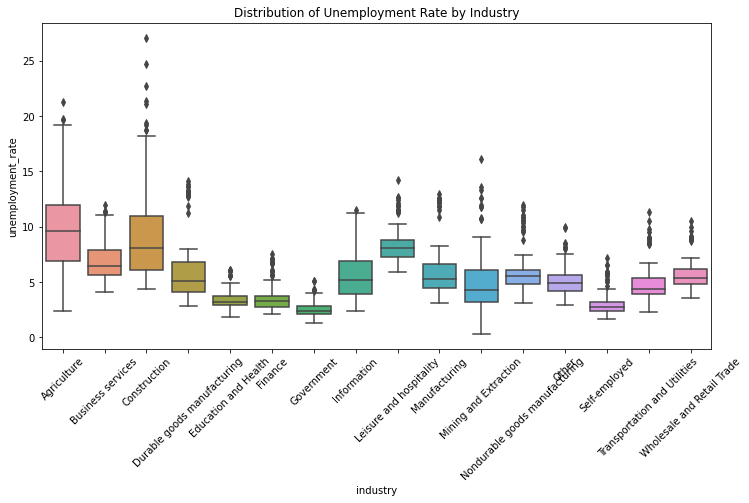

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='industry', y='unemployment_rate', data=melted_data)
plt.title('Distribution of Unemployment Rate by Industry')
plt.xticks(rotation=45)
plt.show()

### 3. Using line chart visualizing the unemployment rate of workers by industry 

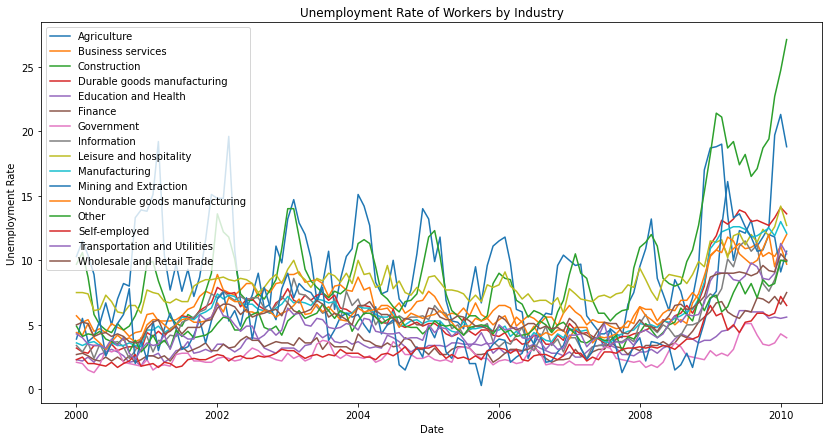

In [17]:
plt.figure(figsize=(14, 7))
for industry in melted_data['industry'].unique():
    plt.plot(melted_data[melted_data['industry'] == industry].index, 
             melted_data[melted_data['industry'] == industry]['unemployment_rate'], 
             label=industry)

plt.title('Unemployment Rate of Workers by Industry')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()

### 4. Plotting the monthly and yearly trends

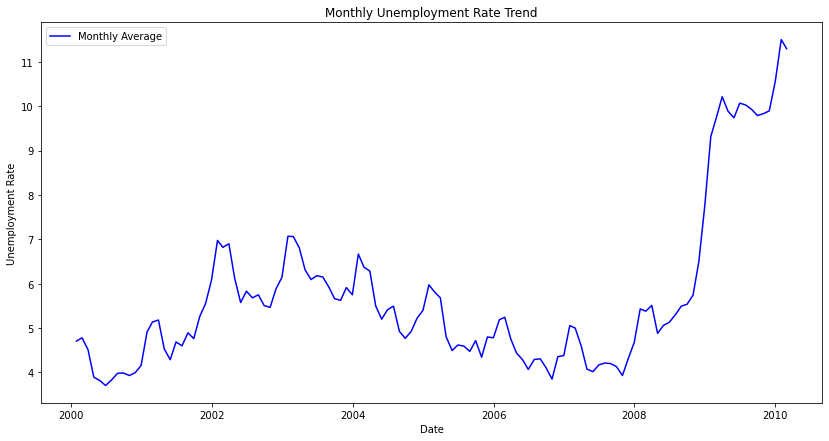

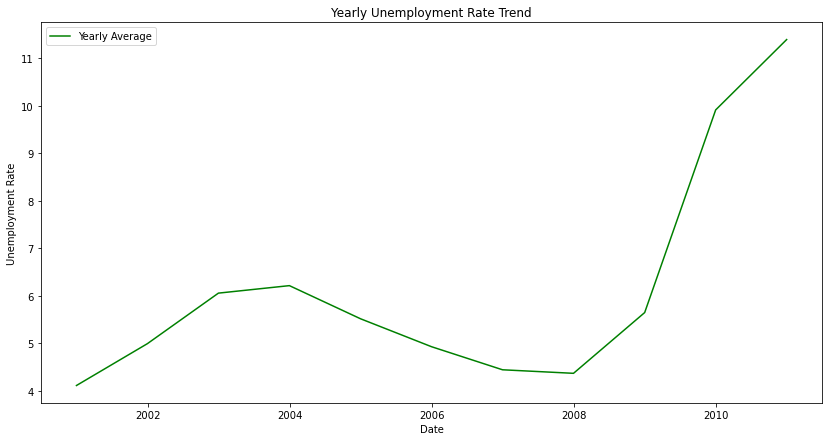

In [18]:
monthly_trend = melted_data.resample('M').mean()
yearly_trend = melted_data.resample('Y').mean()

plt.figure(figsize=(14, 7))
plt.plot(monthly_trend.index, monthly_trend['unemployment_rate'], label='Monthly Average', color='blue')
plt.title('Monthly Unemployment Rate Trend')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(yearly_trend.index, yearly_trend['unemployment_rate'], label='Yearly Average', color='green')
plt.title('Yearly Unemployment Rate Trend')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()

### 5. Applying time series decomposition to dataset to visualize the trend and seasonality

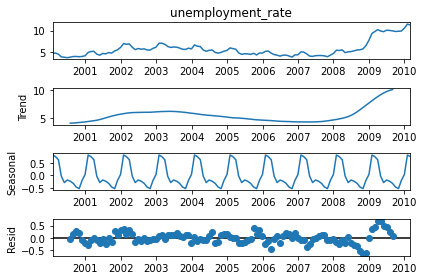

In [19]:
decomposition = seasonal_decompose(monthly_trend['unemployment_rate'], model='additive')
decomposition.plot()
plt.show()

### 6. Visualizing the seasonality of Agriculture, Health and Finance sector

<Figure size 720x576 with 0 Axes>

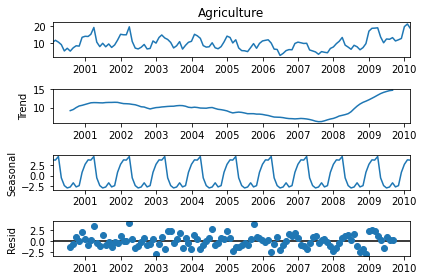

<Figure size 720x576 with 0 Axes>

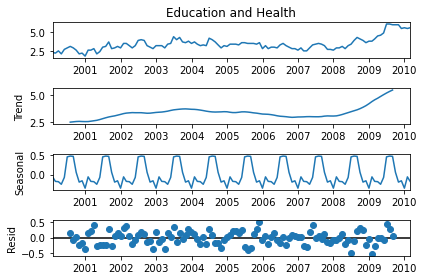

<Figure size 720x576 with 0 Axes>

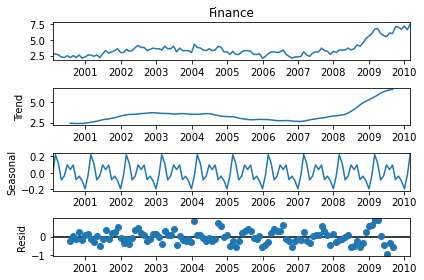

In [32]:
sectors = ['Agriculture', 'Education and Health', 'Finance']
for sector in sectors:
    if sector in df.columns:
        decomposition = seasonal_decompose(df[sector].resample('M').mean(), model='additive')
        plt.figure(figsize=(10, 8))
        decomposition.plot()
        plt.show()

### 7. Visualize the seasonality of multiple time series and the correlation between each time series in the dataset 

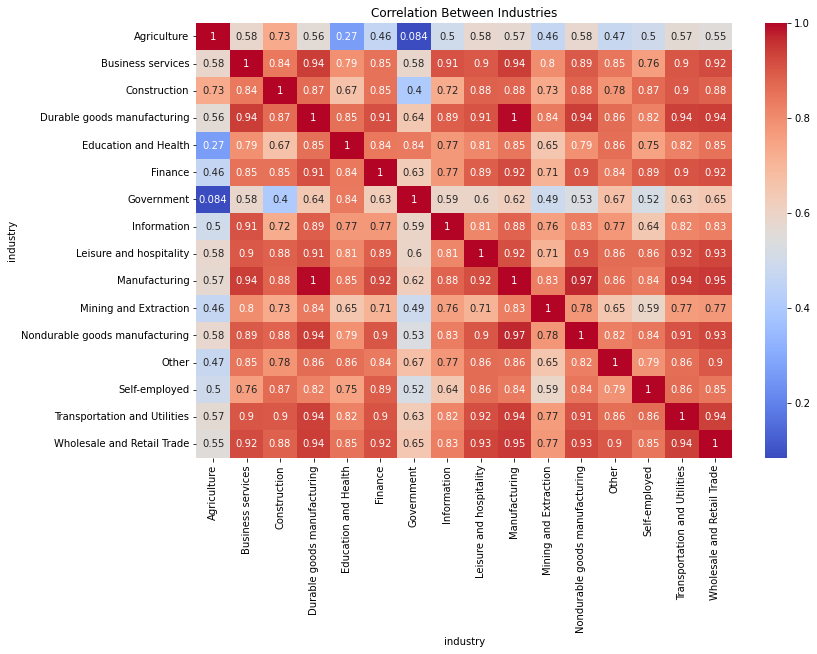

<Figure size 720x576 with 0 Axes>

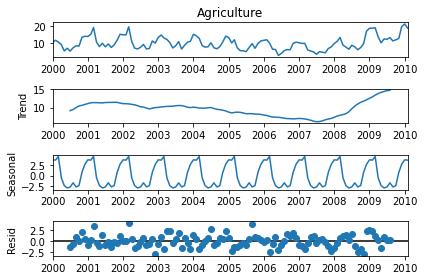

<Figure size 720x576 with 0 Axes>

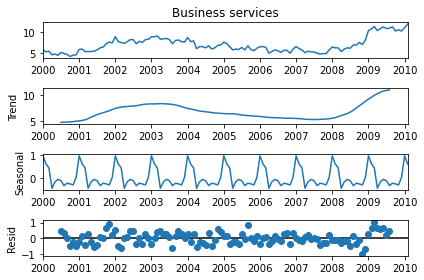

<Figure size 720x576 with 0 Axes>

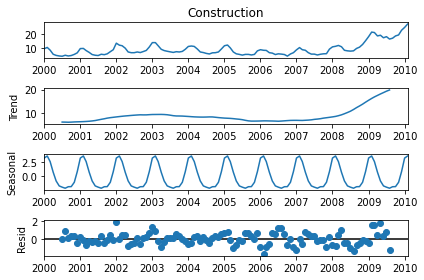

<Figure size 720x576 with 0 Axes>

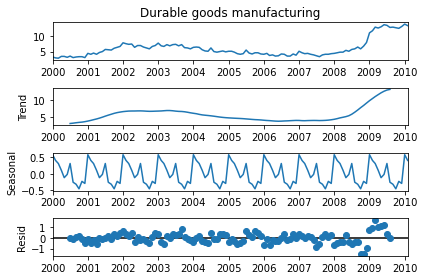

<Figure size 720x576 with 0 Axes>

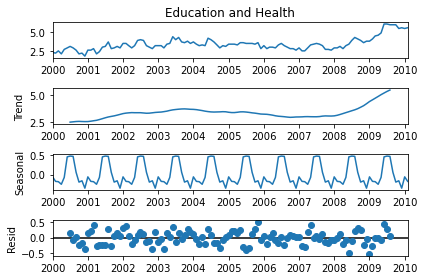

<Figure size 720x576 with 0 Axes>

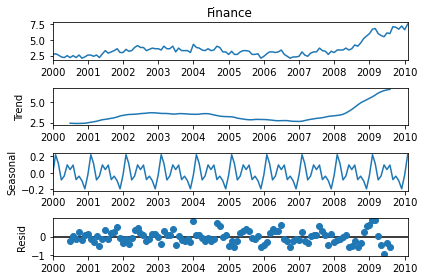

<Figure size 720x576 with 0 Axes>

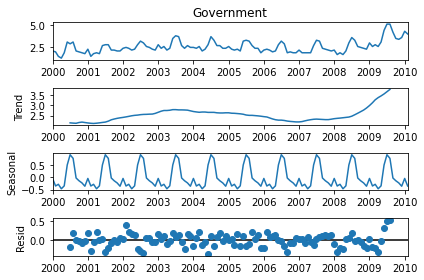

<Figure size 720x576 with 0 Axes>

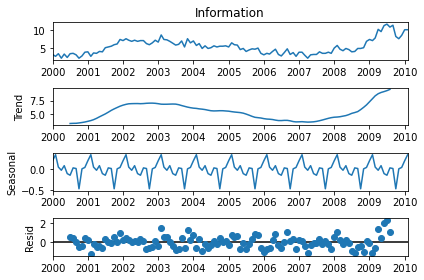

<Figure size 720x576 with 0 Axes>

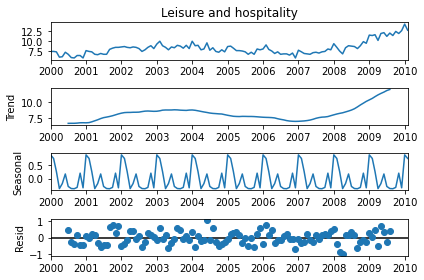

<Figure size 720x576 with 0 Axes>

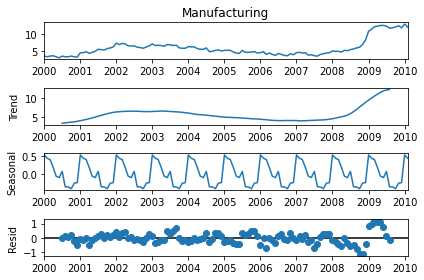

<Figure size 720x576 with 0 Axes>

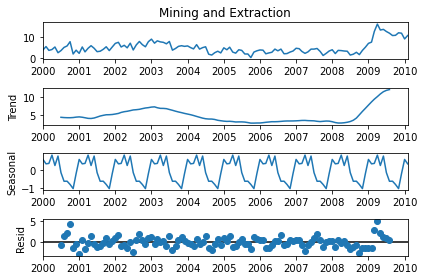

<Figure size 720x576 with 0 Axes>

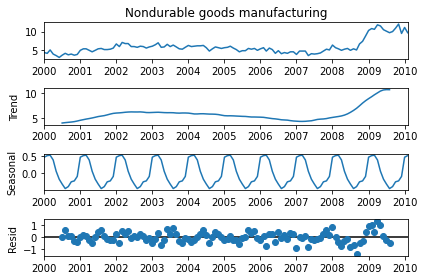

<Figure size 720x576 with 0 Axes>

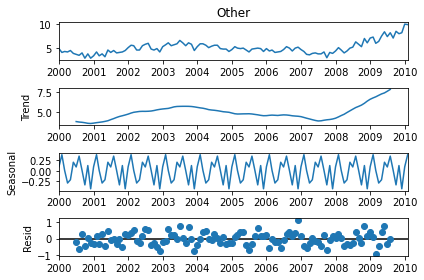

<Figure size 720x576 with 0 Axes>

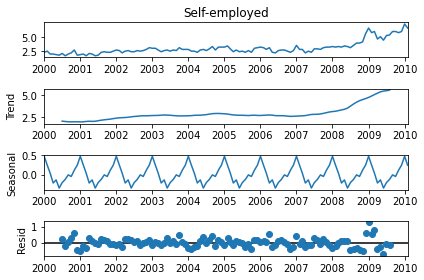

<Figure size 720x576 with 0 Axes>

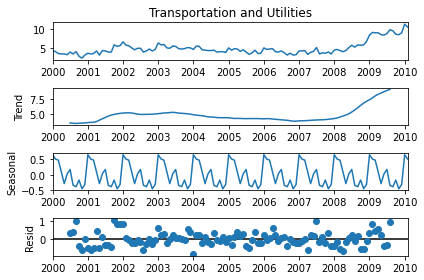

<Figure size 720x576 with 0 Axes>

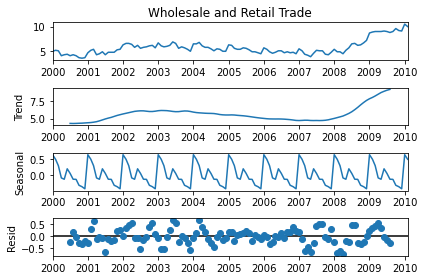

In [35]:
pivot_data = melted_data.pivot_table(values='unemployment_rate', index='datestamp', columns='industry')
plt.figure(figsize=(12, 8))
correlation_matrix = pivot_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Industries')
plt.show()

for industry in pivot_data.columns:
    decomposition = seasonal_decompose(pivot_data[industry].dropna(), model='additive')
    plt.figure(figsize=(10, 8))
    decomposition.plot()
    plt.show()